In [1]:
## Random Forest
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import os
import datetime
from datetime import date
from datetime import time
from datetime import datetime
import seaborn as sns
import scipy as sp
import random
import time
import sklearn
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier 
## common model helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import feature_extraction
from sklearn import model_selection
from sklearn import metrics
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
path = 'H:/data/titanic'
os.chdir(path)
os.getcwd()
data_raw = pd.read_csv('train.csv', sep = ',')
data_val = pd.read_csv('test.csv', sep = ',')
data1 = data_raw.copy(deep = True)
data_cleaner = [data1, data_val]
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test columns with null values:\n',data_val.isnull().sum())
print("-"*10)
data_cleaner = [data1, data_val]
## treat missing values
for dataset in data_cleaner:
    
    dataset["Age"].fillna(dataset["Age"].median(), inplace = True)
    
    dataset["Embarked"].fillna(dataset["Embarked"].mode()[0], inplace = True)
    
    dataset["Fare"].fillna(dataset["Fare"].median(), inplace = True)

drop_column = ['PassengerId','Ticket','Cabin']

data1.drop (drop_column, axis =1, inplace = True)
    
print(data1.isnull().sum())
print(data_val.isnull().sum())

for i in data_cleaner:
    
    i["Age"].fillna(i["Age"].median(), inplace = True)
    
    i["Embarked"].fillna(i["Embarked"].mode()[0], inplace = True)
    
    i["Fare"].fillna(i["Fare"].median(), inplace = True)


    
print(data1.isnull().sum())
print(data_val.isnull().sum())

for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] >1 ] = 0
    dataset['Title'] = dataset['Name'].str.split(", ", expand = True)[1].str.split(".", expand = True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    
    stat_min = 10
title_names = (data1['Title'].value_counts()<stat_min)
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())

## convert objects to category using label encoder
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
## define y variable
Target  = ['Survived']
#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x

#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

## train test split
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)

## data sets
train1_x, test1_x, train1_y, test1_y 
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin 
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch

C:\Users\HP\Anaconda2\envs\py36\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



(     Pclass  SibSp  Parch   Age      Fare  FamilySize  IsAlone  Sex_female  \
 105       3      0      0  28.0    7.8958           1        1           0   
 68        3      4      2  17.0    7.9250           7        0           1   
 253       3      1      0  30.0   16.1000           2        0           0   
 320       3      0      0  22.0    7.2500           1        1           0   
 706       2      0      0  45.0   13.5000           1        1           1   
 271       3      0      0  25.0    0.0000           1        1           0   
 424       3      1      1  18.0   20.2125           3        0           0   
 752       3      0      0  33.0    9.5000           1        1           0   
 615       2      1      2  24.0   65.0000           4        0           1   
 2         3      0      0  26.0    7.9250           1        1           1   
 882       3      0      0  22.0   10.5167           1        1           1   
 467       1      0      0  56.0   26.5500          

In [2]:
train1_x.shape

(668, 8)

In [3]:
## RandomForest Hyperparameter tuning using randomized searchCV
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

## no of trees in Random forest
n_estimators = [int(x) for x in np.linspace( start = 200, stop = 2000, num = 10)]

## no. of features to consider for each split
max_features = ['auto', 'sqrt']

## Maximym number of levels in a tree
max_depth = [int(x) for x in np.linspace(start = 10, stop = 110, num = 11)]
max_depth.append(None)

## minimum samples required to split a node
min_samples_split = [2, 5, 10]

## minimum samples required at leaf node
min_samples_leaf = [1, 2, 4]

## method of selecting for se;ecting sample training for each tree
bootstrap = [True, False]

## create the random grid

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth'    :   max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'bootstrap' : bootstrap }


pprint(random_grid)



{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [4]:
## use Random grid to search for best hyperparameters

## first create the base model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

## random search of parameters using 5 fold cross validation
## search across 100 different combinations using all cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter= 100, cv = 5, verbose=2, random_state= 42,
                              n_jobs = -1)

## fit the random search model
rf_random.fit(train1_x, train1_y)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.2min finished
C:\Users\HP\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [5]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 800}

In [6]:
## to determine if random search yeilded a better model compare the base model with best random search model

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, auc, roc_curve, precision_recall_curve, log_loss, f1_score, average_precision_score

### base model for RandomForest
def evaluate(model, test_features, test_labels) :
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels , predictions)
    class_report = classification_report(test_labels, predictions)
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print(class_report)
    
    return accuracy

base_model = RandomForestClassifier(n_estimators= 10, random_state=42)
base_model.fit(train1_x, train1_y)
base_accuracy = evaluate(base_model, test1_x, test1_y)

y_pred_prob = base_model.predict_proba(test1_x)[:,1]
auc = roc_auc_score(test1_y, y_pred_prob )
print('auc is %3.2f'% auc)

Accuracy = 0.85%.
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       139
           1       0.86      0.71      0.78        84

   micro avg       0.85      0.85      0.85       223
   macro avg       0.85      0.82      0.83       223
weighted avg       0.85      0.85      0.84       223

auc is 0.88


C:\Users\HP\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [7]:
## try  with random search params

best_random = rf_random.best_estimator_
best_random.fit(train1_x, train1_y)
best_accuracy = evaluate(best_random, test1_x, test1_y)

y_pred_prob1 = best_random.predict_proba(test1_x)[:,1]
auc_random = roc_auc_score(test1_y, y_pred_prob1 )
print('auc is %3.2f'% auc_random)

C:\Users\HP\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy = 0.84%.
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       139
           1       0.83      0.74      0.78        84

   micro avg       0.84      0.84      0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223

auc is 0.90


In [8]:
## random seacrch allowed to narrow down the rang for each hyper paraeter
## now let us try GridSearchCV
from sklearn.model_selection import GridSearchCV
## create param_ grid
param_grid =  {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

## create a  base model
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator= rf, param_grid=param_grid, cv = 5, n_jobs= -1, verbose=2)
grid_search.fit(train1_x, train1_y)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  3.7min finished
C:\Users\HP\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [9]:
grid_search.best_params_
best_grid = grid_search.best_estimator_
best_grid.fit(train1_x, train1_y)
grid_accuracy = evaluate(best_grid, test1_x, test1_y)
y_pred_prob2 = best_grid.predict_proba(test1_x)[:,1]
auc_grid = roc_auc_score(test1_y, y_pred_prob2 )
print('auc is %3.2f'% auc_grid)

## how much improement from  random search to grid scearch
print('Improvement of accuracy is {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))
print('Improvement of auc is {:0.2f}%.'.format( 100 * (auc_grid - auc_random) / auc_random))

Accuracy = 0.84%.
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       139
           1       0.82      0.74      0.78        84

   micro avg       0.84      0.84      0.84       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223

auc is 0.90
Improvement of accuracy is -1.06%.
Improvement of auc is 0.12%.


C:\Users\HP\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
##what is called the Bayes error rate,
##which is the absolute minimum possible error in a problem. Bayes error, 
## also called reproducible error, is a combination of latent variables, 
##the factors affecting a problem which we cannot measure, and inherent noise in any physical process.

In [62]:
path = 'H:/data/titanic'
os.chdir(path)
os.getcwd()
train  = pd.read_csv('train.csv', sep = ',')
test = pd.read_csv('test.csv', sep = ',')
#Checking for missing data
NAs = pd.concat([train.isnull().sum()], axis=1, keys=['Train'])
NAs[NAs.sum(axis=1) > 0]
train.pop('Cabin')
train.pop('Name')
train.pop('Ticket')
train.shape
# Filling missing Age values with mean
train['Age'] = train['Age'].fillna(train['Age'].mean())
# Filling missing Embarked values with most common value
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Pclass'] = train['Pclass'].apply(str)
# Getting Dummies from all other categorical vars
for col in train.dtypes[train.dtypes == 'object'].index:
    for_dummy = train.pop(col)
    train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)
train.head()
labels = train.pop('Survived')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25)

In [94]:
## baseline performance

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)


y_pred = rf.predict(x_test)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

C:\Users\HP\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.73436189837330201

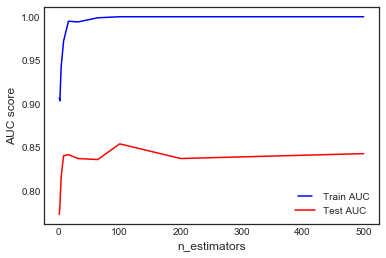

In [95]:
## now lets look at each hyperparamter in deails

n_estimators = [1, 2, 4 ,8, 16, 32, 64, 100, 200, 500 ]
train_results= []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, n_jobs =-1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    
    false_postive_rate, true_positive_rate, thresolds = roc_curve(y_train, train_pred)
    roc_auc = auc(x = false_postive_rate, y = true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test, y_pred)
    roc_auc = auc(x = false_postive_rate, y = true_positive_rate)
    test_results.append(roc_auc)

    
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label= 'Train AUC')
line2,= plt.plot(n_estimators, test_results, 'r', label= 'Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

## N_estimators represent the number of trees in a model. Ususally higher the number of trees, better learns the model. 
## but a high number of trees also increase the computation time and slo down the training process.


C:\Users\HP\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\HP\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\HP\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\HP\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\HP\Anaconda2\envs\py36\lib\site-package

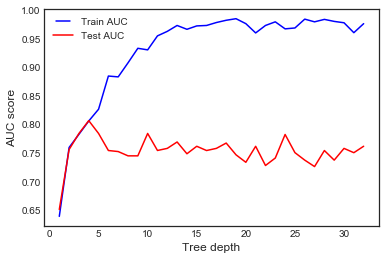

In [105]:
## MAX_DEPTH

max_depths = np.linspace(1, 32, 32, endpoint = True)

train_results =[]
test_results = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth = max_depth, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresolds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    test_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

## max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. 
## We see that our model overfits for large depth values. 
## the trees perfectly predicts all of the train data, however, it fails to generalize the findings for new data

In [ ]:
## min_samples_split
https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d